In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing import image
import numpy as np

Using TensorFlow backend.


In [2]:
# Image preprocessing
img_height = img_width = 150

train_data_dir = 'data/train'
test_data_dir = 'data/test'

train_samples = 1000
test_samples = 100

epochs = 50
batch_size = 20

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_height, img_width)
else:
    input_shape = (img_height, img_width, 3)

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='binary')
test_generator = train_datagen.flow_from_directory(test_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [3]:
# Model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.summary()

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation(activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit_generator(train_generator, 
                    steps_per_epoch=train_samples // batch_size, 
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=test_samples // batch_size)
model.save_weights('fist.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2

50/50 [==============================] - 84s 2s/step - loss: 0.3536 - acc: 0.8470 - val_loss: 0.5287 - val_acc: 0.7600
Epoch 46/50
50/50 [==============================] - 81s 2s/step - loss: 0.3873 - acc: 0.8260 - val_loss: 0.5200 - val_acc: 0.7400
Epoch 47/50
50/50 [==============================] - 83s 2s/step - loss: 0.3566 - acc: 0.8160 - val_loss: 0.5471 - val_acc: 0.7100
Epoch 48/50
50/50 [==============================] - 81s 2s/step - loss: 0.3567 - acc: 0.8360 - val_loss: 0.5043 - val_acc: 0.7400
Epoch 49/50
50/50 [==============================] - 83s 2s/step - loss: 0.3361 - acc: 0.8460 - val_loss: 0.5330 - val_acc: 0.7400
Epoch 50/50
50/50 [==============================] - 82s 2s/step - loss: 0.3871 - acc: 0.8290 - val_loss: 0.5020 - val_acc: 0.8300


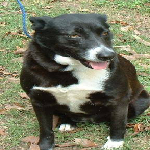

In [18]:
image_pred = image.load_img('data/test/1000.jpg', target_size=(150, 150))
image_pred

In [19]:
image_pred = image.img_to_array(image_pred)
image_pred = np.expand_dims(image_pred, axis=0)


result = model.predict_classes(image_pred)
print(result)

if result[0][0] == 1:
    print("dog")
else:
    print("cat")

[[1]]
dog
